In [20]:
import pandas as pd                         #OKK
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='rainbow')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [24]:
df = pd.read_csv(r"C:\Users\Shruti\ Python files\Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [32]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [34]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [36]:
np.nan

nan

In [38]:
df.loc[:,"hair":'catsize'].replace(0, np.nan)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,4.0,NaN,NaN,1.0
1,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,4.0,1.0,NaN,1.0
2,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN
3,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,4.0,NaN,NaN,1.0
4,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,4.0,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,2.0,1.0,NaN,1.0
97,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,6.0,NaN,NaN,NaN
98,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,4.0,1.0,NaN,1.0
99,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df.loc[:,"hair":'catsize'] = df.loc[:,"hair":'catsize'].replace(0, np.nan)

In [42]:
df.isna().sum()

animal name     0
hair           58
feathers       81
eggs           42
milk           60
airborne       77
aquatic        65
predator       45
toothed        40
backbone       18
breathes       21
venomous       93
fins           84
legs           23
tail           26
domestic       88
catsize        57
type            0
dtype: int64

In [44]:
from sklearn.impute import SimpleImputer

In [46]:
si = SimpleImputer(strategy='median')

df.loc[:,"hair":'catsize'] = si.fit_transform(df.loc[:,"hair":'catsize']) 

In [48]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [96]:
data = df.drop(columns=['animal name'])
data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,4
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1
97,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,1.0,1.0,1.0,6
98,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1
99,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,7


In [98]:
x = data.iloc[:,:-1]
y = df['type']

In [100]:
sc = StandardScaler()             #model building

x = sc.fit_transform(x)

In [102]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [104]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [106]:
train_acc = []               #training accuracy
test_acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train_acc.append(knn.score(xtrain,ytrain))
    test_acc.append(knn.score(xtest,ytest))

In [108]:
train_acc

[0.35,
 0.5,
 0.35,
 0.475,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875,
 0.5875]

In [110]:
test_acc

[0.09523809523809523,
 0.5238095238095238,
 0.09523809523809523,
 0.5238095238095238,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143]

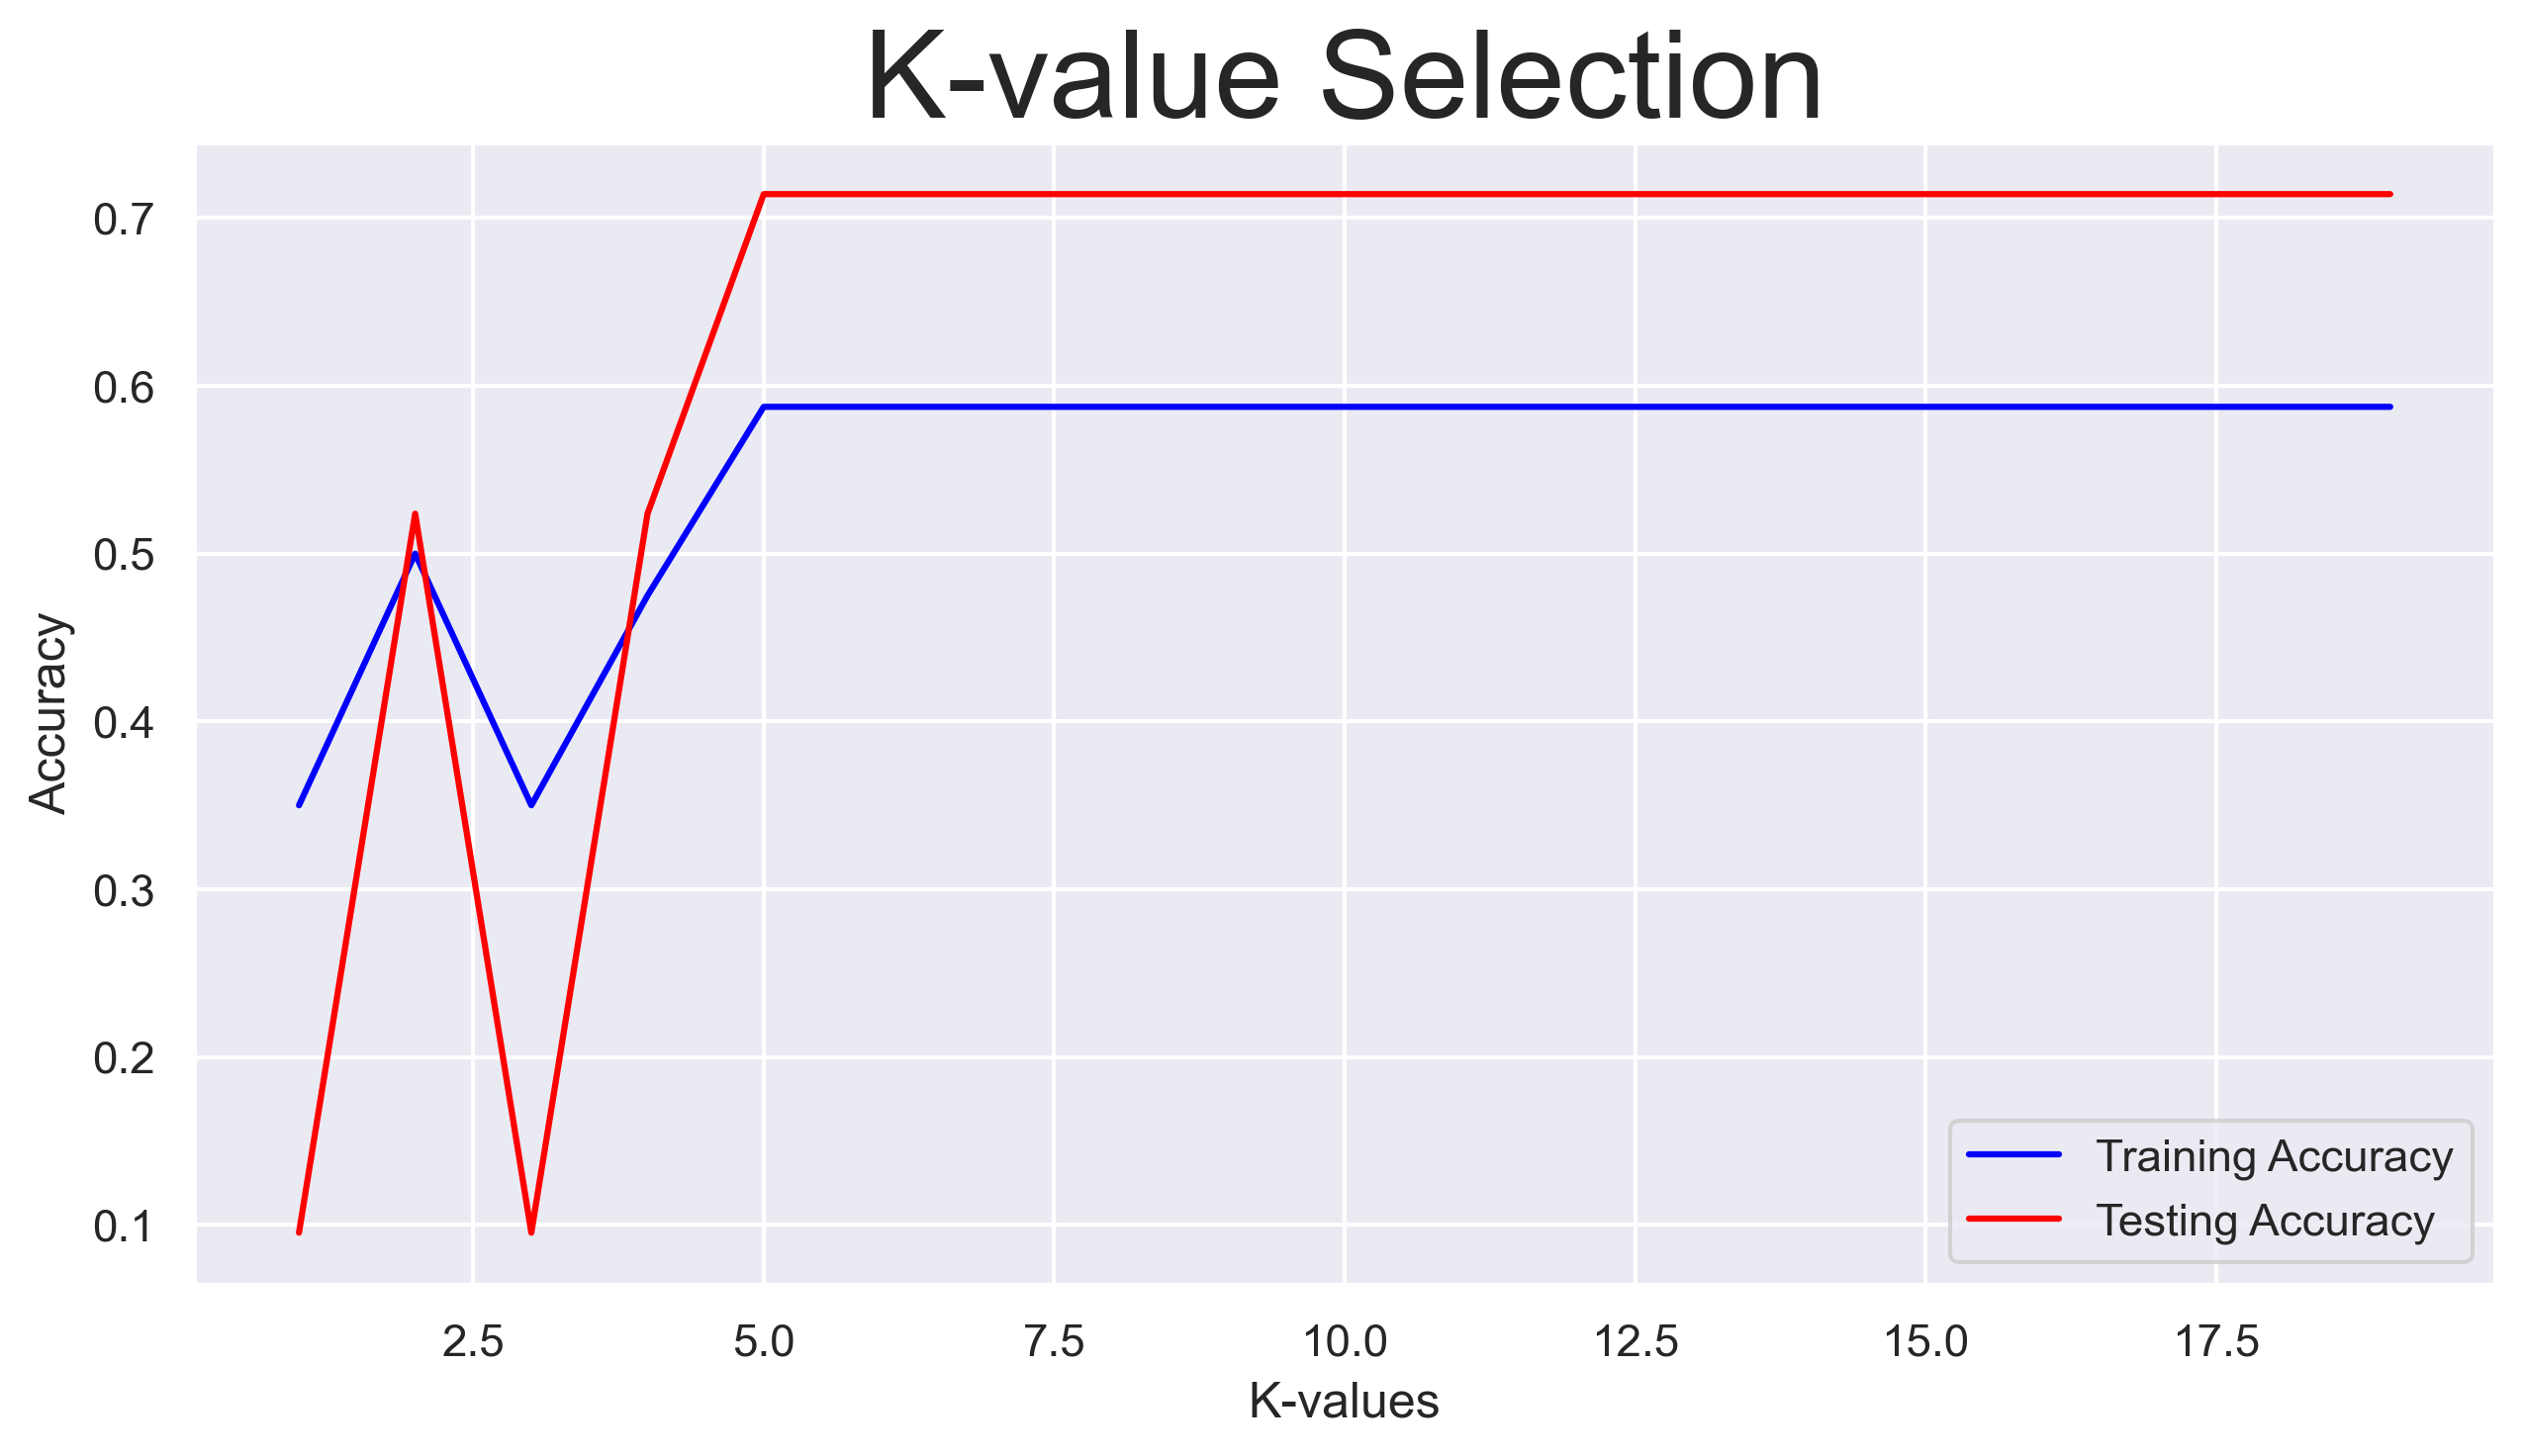

In [112]:
plt.plot(range(1,20), train_acc, color = 'blue' , label = 'Training Accuracy')
plt.plot(range(1,20), test_acc, color = 'red', label = 'Testing Accuracy')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-value Selection',size = 30)
plt.legend() 

In [136]:
knn = KNeighborsClassifier(n_neighbors=5)     
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
print(f"Train: {knn.score(xtrain,ytrain)}\nTest: {knn.score(xtest,ytest)}")

Train: 0.5875
Test: 0.7142857142857143


# Interview Questions:

##### 1. What are the key hyperparameters in KNN?

Number of Neighbors, Distance Metric(Euclidean distance),Weighting of Neighbors

##### 2. What distance metrics can be used in KNN?

Euclidean Distance, Manhattan